In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import main.connectToAccess as source
from main.readLabel import getScholarLabel
from main.readLabel import getPoliticalLable
from main.readLabel import getLable
from main.createGraph import CreateGraph
import pandas as pd
from main.statistic import Statistic
import main.cleanData as cd
import main.drawNetwork as dn
import importlib

In [3]:
'''
打印用于筛选文人关系与政治关系的标签
'''
first=pd.Series(getScholarLabel())
second=pd.Series(getPoliticalLable())
lab1=pd.DataFrame()
lab1['文人关系']=first
lab1['政治关系']=second
lab1





,文人关系,政治关系
0,學生為Y,不合
1,書序由Y所作,拒絕在Y主政的政府中任職
2,為Y學派的成員,拒絕在Y的主政期出仕
3,弟子為Y,拒絕會面
4,為Y所著書作跋,欲辟Y為幕僚但被拒絕
5,推薦Y參加制科考試,拒為Y之黨
6,文風效法Y,拒Y游説
7,詩作為Y所稱道,反對/攻訐
8,稱道Y的詩作,彈劾
9,學術源宗由Y撰寫,反對/不支持Y的政策


In [2]:
'''
各个朝代的关系数量
'''
from main.connectToAccess import getData
import pandas as pd
dynasties={
    '唐':[618,907],
    '宋':[960,1279],
    '元':[1234,1367],
    '明':[1368,1644],
    '清':[1644,1911]
}
#collect=pd.DataFrame(columns=['朝代'，'关系数量'])
list=[]
name=[]
for key,value in dynasties.items():
    count=getData(start=value[0],end=value[1]).count()[0]
    list.append(count)
    name.append(key)
table=pd.DataFrame(list,index=name,columns=["关系数量"])
table.index.name="朝代"
table.loc["总计"]=table.sum()
table



,关系数量
朝代,
唐,386
宋,67337
元,27156
明,27919
清,4215
总计,127013


In [3]:
'''
各个网络中的人物数量与关系数量
'''
dynasties={
    '唐':[618,907],
    '宋':[960,1279],
    '元':[1279,1367],
    '明':[1368,1644],
    '清':[1644,1911]
}

def getNodeAndEdge(dynastieDic):
    total=pd.DataFrame(index=pd.MultiIndex.from_product([['唐','宋','元','明','清'],['人文网络','政治网络']]),columns=['人物数量','关系数量'])
    for key,value in dynastieDic.items():
        table=source.getData(start=value[0],end=value[1])
        scholarLabel=getScholarLabel()
        data=table[table[3].isin(scholarLabel)]
        scholarNetwork=CreateGraph(data)
        scholarG=scholarNetwork.getGraph()

        politicalLabel=getPoliticalLable()
        data=table[table[3].isin(politicalLabel)]
        politicalNetwork=CreateGraph(data)
        politicalG=politicalNetwork.getGraph()
        total.loc[(key,'人文网络'),:]=[nx.number_of_nodes(scholarG),nx.number_of_edges(scholarG)]
        total.loc[(key,'政治网络'),:]=[nx.number_of_nodes(politicalG),nx.number_of_edges(scholarG)]
    return total
getNodeAndEdge(dynasties)


人物数量  关系数量
唐 人文网络    39    29
  政治网络    30    29
宋 人文网络  5054  7476
  政治网络  2034  7476
元 人文网络  2497  4530
  政治网络   286  4530
明 人文网络  3770  6005
  政治网络   313  6005
清 人文网络  1519  1386
  政治网络    46  1386

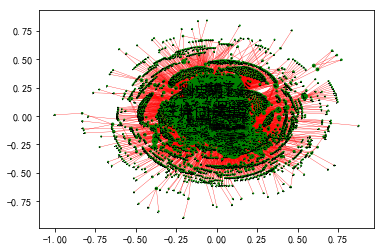

In [9]:
'''
绘制关系图
'''
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig=plt.figure()
ax=fig.add_subplot()
table=source.getData(start=1234,end=1367)
scholarLabel=getScholarLabel()
cleanData=cd.CleanData(label=scholarLabel,table=table)
data=cleanData.get_table()
scholarNetwork=CreateGraph(data)
G=scholarNetwork.getGraph()
drawNetwork=dn.DrawNetwork(ax,G,font_size=0.08)
drawNetwork.draw()

In [11]:
scholarStat=Statistic(G)
degree=scholarStat.getDegreeCentrality()
between=scholarStat.getBetweennessCentrality()
close=scholarStat.getClosenessCentrality()
scholarTable=pd.DataFrame([degree,between,close]).T
scholarTable=scholarTable.sort_values(by=['度中心性','中介中心性','接近中心性'],ascending=False)
scholarTable

,度中心性,中介中心性,接近中心性
吳澄,0.069097,0.127524,0.357452
方回,0.062629,0.122074,0.355054
劉克莊,0.060276,0.100883,0.327578
虞集,0.058512,0.154081,0.380500
魏了翁,0.055572,0.090734,0.330167
王惲,0.050573,0.072001,0.304604
真德秀,0.037636,0.057869,0.319245
袁桷,0.037048,0.060502,0.342306
吳師道,0.033814,0.060110,0.341937
戴表元,0.033814,0.050578,0.340800


In [13]:
table=source.getData(start=1234,end=1367)
politicalLabel=getPoliticalLable()
data=table[table[3].isin(politicalLabel)]
politicalNetwork=CreateGraph(data)
G=politicalNetwork.getGraph()
politicalStat=Statistic(G)
degree=politicalStat.getDegreeCentrality()
between=politicalStat.getBetweennessCentrality()
close=politicalStat.getClosenessCentrality()
politicalTable=pd.DataFrame([degree,between,close]).T
politicalTable=politicalTable.sort_values(by=['度中心性','中介中心性','接近中心性'],ascending=False)
def getTable(start,end,label):
    table=source.getData(start=start,end=end)
    cleanData=cd.CleanData(label=label,table=table)
    data=cleanData.get_table()
    G=CreateGraph(data).getGraph()
    stat=Statistic(G)
    degree=stat.getDegreeCentrality()
    between=stat.getBetweennessCentrality()
    close=stat.getClosenessCentrality()
    Table=pd.DataFrame([degree,between,close]).T
    Table=Table.sort_values(by=['度中心性','中介中心性','接近中心性'],ascending=False)
    return Table

In [14]:
politicalTable=getTable(1644,1911,getPoliticalLable())
scholarTable=getTable(1644,1911,getScholarLabel())
degreeList=scholarTable.sort_values(by='度中心性',ascending=False).head(100).index.intersection(
    politicalTable.sort_values(by='度中心性',ascending=False).head(100).index)
betweenList=scholarTable.sort_values(by='中介中心性',ascending=False).head(100).index.intersection(
    politicalTable.sort_values(by='中介中心性',ascending=False).head(100).index)
closeList=scholarTable.sort_values(by='接近中心性',ascending=False).head(100).index.intersection(
    politicalTable.sort_values(by='接近中心性',ascending=False).head(100).index)

In [32]:
politicalTable.head(10)

,度中心性,中介中心性,接近中心性
錢大昕,0.133333,0.015152,0.133333
紀昀,0.111111,0.019192,0.120988
高鳳翰,0.066667,0.003030,0.066667
汪德鉞,0.044444,0.006061,0.083761
張騰蛟,0.044444,0.006061,0.083761
李光地,0.044444,0.001010,0.044444
高佳高斌,0.022222,0.000000,0.072727
高佳高晉,0.022222,0.000000,0.072727
秦蕙田,0.022222,0.000000,0.072727
董邦達,0.022222,0.000000,0.072727


In [33]:
scholarTable.head(10)

,度中心性,中介中心性,接近中心性
鄭蘭孫,0.012976,0.009997,0.031074
左錫嘉,0.012976,0.009390,0.042110
王瓊,0.012111,0.031032,0.047186
汪端,0.012111,0.018811,0.038252
紀昀,0.012111,0.017956,0.030952
張允滋,0.010381,0.025301,0.043729
任兆麟,0.010381,0.002001,0.043271
張綸英,0.009516,0.033591,0.033877
潘素心,0.009516,0.031989,0.046010
顧翎,0.009516,0.007535,0.048378


In [66]:
interList=scholarTable.sort_values(by='度中心性',ascending=False).head(100).index.intersection(
    politicalTable.sort_values(by='度中心性',ascending=False).head(100).index)
len(interList)

27

In [67]:
interList=scholarTable.sort_values(by='中介中心性',ascending=False).head(100).index.intersection(
    politicalTable.sort_values(by='中介中心性',ascending=False).head(100).index)
len(interList)

22

In [69]:
interList=scholarTable.sort_values(by='接近中心性',ascending=False).head(100).index.intersection(
    politicalTable.sort_values(by='接近中心性',ascending=False).head(100).index)
len(interList)


3

In [5]:
data={"唐":[0,0,0],
     "宋":[34,26,24],
     "元":[27,22,3],
     "明":[30,25,12],
     "清":[2,2,0]}
frame=pd.DataFrame(data,index=['度中心性','中介中心性','接近中心性'])
frame.T

,度中心性,中介中心性,接近中心性
唐,0,0,0
宋,34,26,24
元,27,22,3
明,30,25,12
清,2,2,0


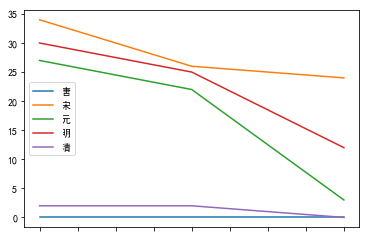

In [7]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#plt.figure(figsize=[9,9])
axe=plt.subplot()
frame.plot(ax=axe)

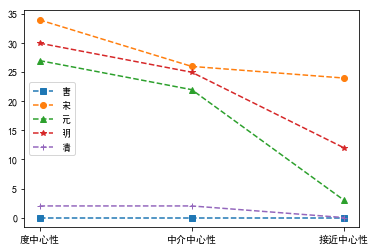

In [33]:
'''
绘制折线图
'''
import matplotlib.pyplot as plt
import pandas as pd


data={"唐":[0,0,0],
     "宋":[34,26,24],
     "元":[27,22,3],
     "明":[30,25,12],
     "清":[2,2,0]}
frame=pd.DataFrame(data,index=['度中心性','中介中心性','接近中心性'])

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(frame["唐"],marker='s',linestyle="--")
ax.plot(frame["宋"],marker='o',linestyle="--")
ax.plot(frame["元"],marker='^',linestyle="--")
ax.plot(frame["明"],marker='*',linestyle="--")
ax.plot(frame["清"],marker='+',linestyle="--")
ax.legend(loc="best")
plt.show()

